<a href="https://colab.research.google.com/github/AndrewPiasecki/PythonFinalProject/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Loading and Cleaning (Data Conversion might be Needed)


In [61]:
import plotly.graph_objects as go
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl



**Import Data**

In [62]:
url = "https://raw.githubusercontent.com/AndrewPiasecki/PythonFinalProject/main/IMBD_Data.csv"
df = pd.read_csv(url)

df

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,tt9770150,Nomadland,Nomadland,0,107,Drama,7.3,175977,5000000,39458207.0,9/11/2020,Chloé Zhao
3344,tt9777666,The Tomorrow War,The Tomorrow War,0,138,"Action,Adventure,Drama",6.6,220617,200000000,14400000.0,6/30/2021,Chris McKay
3345,tt9784798,Judas and the Black Messiah,Judas and the Black Messiah,0,126,"Biography,Drama,History",7.4,88568,26000000,7478009.0,2/1/2021,Shaka King
3346,tt9844522,Escape Room: Tournament of Champions,Escape Room: Tournament of Champions,0,88,"Action,Adventure,Horror",5.7,56955,15000000,65774490.0,7/1/2021,Adam Robitel


**Find the Columns with empty Values**

In [63]:


emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")


Columns with empty data:
	- gross
	- releaseDate


**Remove Rows with Empty Column Values**

In [64]:
df = df.dropna(subset=emptyCols)

df.head()

,ID,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner


**Test If Columns have been Removed**

In [65]:
emptyCols = [col for col in df.columns if df[col].isnull().any()]

if not emptyCols:
    print("No columns have empty data.")
else:
    print("Columns with empty data:")
    for col in emptyCols:
        print(f"\t- {col}")

No columns have empty data.


**Remove Uneeded Column**


In [66]:
df = df.drop('isAdult', axis = 1)

df.head()

,ID,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,12/11/2001,James Mangold
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,12/11/1970,Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1/1/1970,Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1/25/1970,Robert Altman
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,2/4/1970,Franklin J. Schaffner


In [67]:
df['releaseDate'] = pd.to_datetime(df['releaseDate'])
df['year'] = df['releaseDate'].dt.year

In [68]:
df.dtypes

ID                        object
primaryTitle              object
originalTitle             object
runtimeMinutes             int64
genres                    object
averageRating            float64
numVotes                   int64
budget                     int64
gross                    float64
releaseDate       datetime64[ns]
directors                 object
year                       int64
dtype: object

# Descriptive Statistics (Basic Histograms)


**Mean**

In [69]:
meanAR = round(df['averageRating'].mean(), 2)
meanAR

6.74

**Mode**

In [70]:
modeAR = round(df['averageRating'].mode(), 2)
modeAR

0    6.5
Name: averageRating, dtype: float64

**Standard Deviation**

In [71]:
standardDeviationAR = round(df['averageRating'].std(), 2)
standardDeviationAR

0.88

**Max and Min Budgets**


In [72]:
maxBudget = df['budget'].max()
minBudget = df['budget'].min()

print(maxBudget)
print(minBudget)


356000000
18


**Average Runtime**

In [73]:
average_runtime = df['runtimeMinutes'].mean()
average_runtime

112.73359659781288

**Histogram(s)**

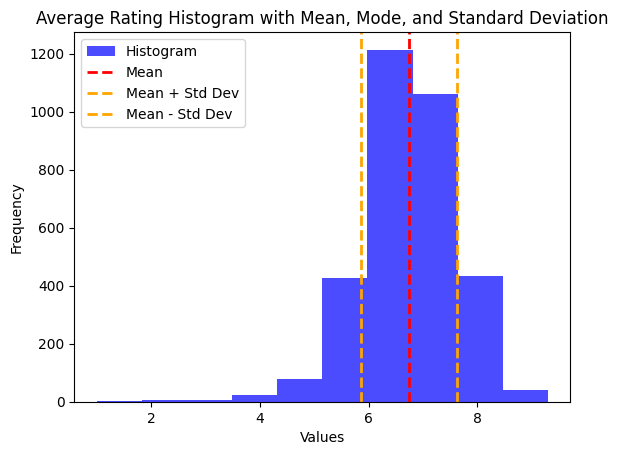

In [74]:
plt.hist(df['averageRating'], bins = 10, color = 'blue', alpha = 0.7, label = 'Histogram')
plt.axvline(meanAR, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(meanAR + standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.axvline(meanAR - standardDeviationAR, color='orange', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
## plt.axvline(modeAR, color='green', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Average Rating Histogram with Mean, Mode, and Standard Deviation')


plt.legend()


plt.show()

# Data Visualization


**Top Genres**

In [75]:
dfTopGenres = df.groupby('genres').size().to_frame(name='Count').reset_index().sort_values(by=['Count'], ascending=False)[:20]
dfTopGenres

,genres,Count
13,"Action,Adventure,Sci-Fi",127
148,"Comedy,Drama,Romance",121
69,"Adventure,Animation,Comedy",110
130,Comedy,101
4,"Action,Adventure,Comedy",98
34,"Action,Crime,Drama",90
177,"Comedy,Romance",86
40,"Action,Crime,Thriller",84
8,"Action,Adventure,Fantasy",82
141,"Comedy,Drama",75


**Release Date**


In [76]:
dfReleaseDate = df.groupby('releaseDate').size().to_frame(name='Count').reset_index().sort_values(by=['Count'], ascending=False)[:20]


**Top Genre Analysis**

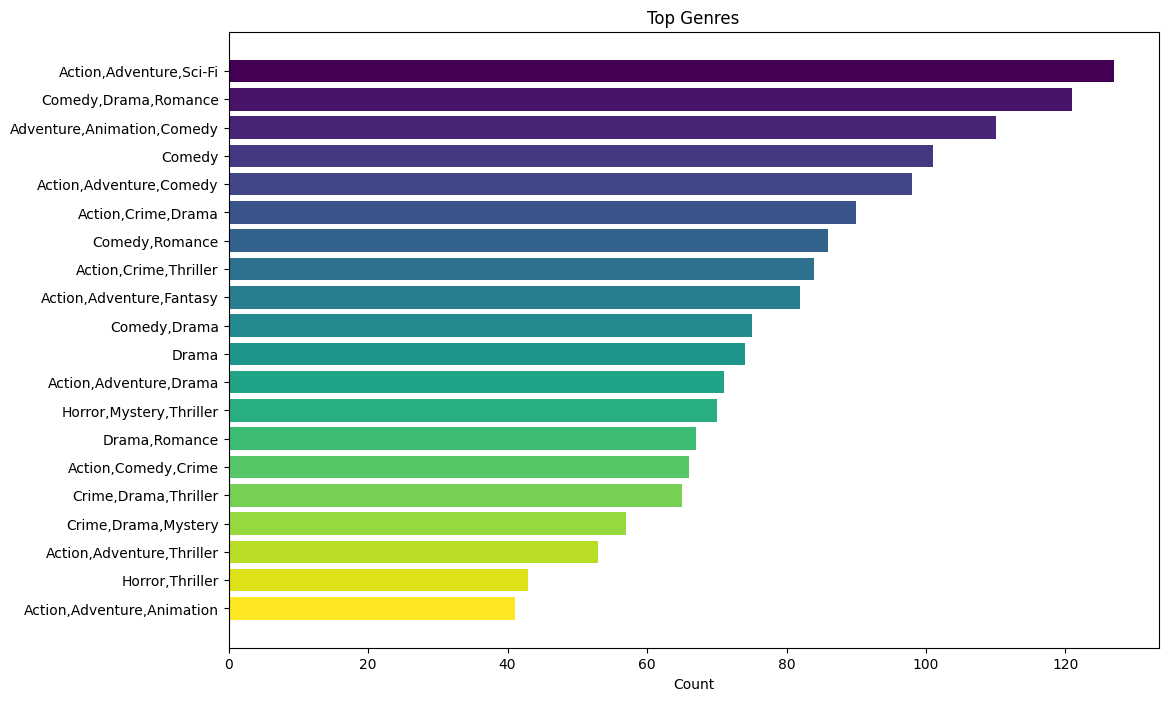

In [77]:
# Plotting the top genres as horizontal bars
plt.figure(figsize=(12, 8))

# Generate a list of different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(dfTopGenres['genres'])))

# Plot each bar with a different color
plt.barh(dfTopGenres['genres'], dfTopGenres['Count'], color=colors)

plt.xlabel('Count')
plt.title('Top Genres')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

In [78]:
# Create a pivot table to prepare the data for the 3D heatmap
heatmap_data = df.groupby(['year', 'genres']).size().unstack().fillna(0)

# Get the unique genres and years
genres = heatmap_data.columns
years = heatmap_data.index

# Create a 3D surface plot
trace = go.Surface(x=genres, y=years, z=heatmap_data.values, colorscale='YlGnBu')

# Create layout for the plot
layout = go.Layout(
    title='3D Genre Usage Over the Years',
    scene=dict(
        xaxis=dict(title='Genre'),
        yaxis=dict(title='Year'),
        zaxis=dict(title='Count'),
    )
)

# Create the figure and show it
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [79]:
# Get the top 20 most used genres
top_genres = df['genres'].value_counts().nlargest(20).index

# Filter the dataframe to include only the top genres
df_top = df[df['genres'].isin(top_genres)]

# Create a pivot table to prepare the data for the stacked area chart
stacked_data = df_top.groupby(['year', 'genres']).size().unstack().fillna(0).T

# Create a stacked area chart
fig = go.Figure()

for genre in stacked_data.index:
    fig.add_trace(go.Scatter(
        x=stacked_data.columns,
        y=stacked_data.loc[genre],
        mode='lines',
        stackgroup='one',
        name=genre
    ))

# Update layout for the plot
fig.update_layout(
    title='Top 20 Genre Usage Over the Years (Stacked Area Chart)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Show the figure
fig.show()

([<matplotlib.patches.Wedge at 0x7ef073a828f0>,
 [Text(1.0651582448717953, 0.27465963187486564, 'Action,Adventure,Sci-Fi'),
  Text(0.8084777048634799, 0.7458979827956904, 'Comedy,Drama,Romance'),
  Text(0.39430678219599613, 1.0268992947286697, 'Adventure,Animation,Comedy'),
  Text(-0.057896963406042216, 1.098475280390214, 'Comedy'),
  Text(-0.47656865091759887, 0.9914042167363321, 'Action,Adventure,Comedy'),
  Text(-0.8055069814815237, 0.7491051346670402, 'Action,Crime,Drama'),
  Text(-1.0134215661322608, 0.4277577927963861, 'Comedy,Romance'),
  Text(-1.0979136610668654, 0.06771700556545823, 'Action,Crime,Thriller'),
  Text(-1.0606576541944663, -0.2915567536495974, 'Action,Adventure,Fantasy'),
  Text(-0.9199696969481342, -0.6030387688176924, 'Comedy,Drama'),
  Text(-0.7039919154759445, -0.8452191330918336, 'Drama'),
  Text(-0.4347955650577292, -1.0104220982372318, 'Action,Adventure,Drama'),
  Text(-0.13843037548310297, -1.0912547966188315, 'Horror,Mystery,Thriller'),
  Text(0.160085845

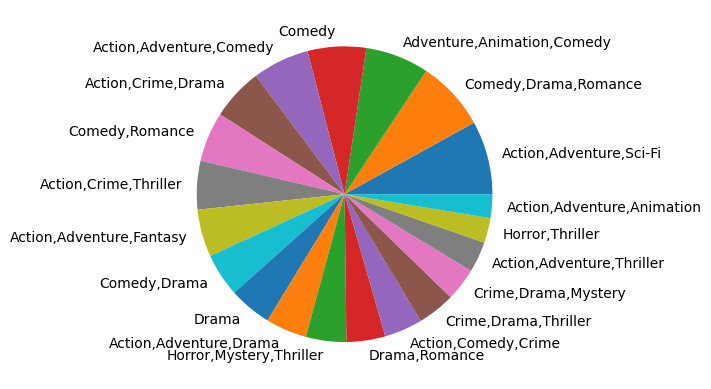

In [80]:
plt.pie(dfTopGenres['Count'], labels = dfTopGenres['genres'])

In [81]:
df.head(10)

,ID,primaryTitle,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,releaseDate,directors,year
0,tt0035423,Kate & Leopold,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,2001
1,tt0065421,The Aristocats,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,1970
2,tt0065938,Kelly's Heroes,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton,1970
3,tt0066026,M*A*S*H,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman,1970
4,tt0066206,Patton,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner,1970
5,tt0066434,THX 1138,THX 1138,86,"Drama,Sci-Fi,Thriller",6.6,53906,777000,2437000.0,1971-03-11,George Lucas,1971
6,tt0066921,A Clockwork Orange,A Clockwork Orange,136,"Crime,Sci-Fi",8.3,864440,2200000,26960374.0,1971-12-19,Stanley Kubrick,1971
7,tt0066995,Diamonds Are Forever,Diamonds Are Forever,120,"Action,Adventure,Thriller",6.5,112043,7200000,43829933.0,1971-12-14,Guy Hamilton,1971
8,tt0066999,Dirty Harry,Dirty Harry,102,"Action,Crime,Thriller",7.7,165277,4000000,35988495.0,1971-12-21,"Don Siegel, Clint Eastwood",1971
9,tt0067116,The French Connection,The French Connection,104,"Action,Crime,Drama",7.7,131995,1800000,51701871.0,1971-10-07,William Friedkin,1971


In [82]:
dfReleaseDate['releaseDate'] = pd.to_datetime(dfReleaseDate['releaseDate'])

In [83]:
dfReleaseDate = dfReleaseDate.sort_values(by = 'releaseDate')
dfReleaseDate

,releaseDate,Count
7,1905-06-14,6
8,1905-06-15,5
11,1905-06-18,5
12,1905-06-19,8
13,1905-06-20,6
14,1905-06-21,5
15,1905-06-22,5
1333,2006-09-01,4
1339,2006-09-09,4
1401,2007-06-12,4


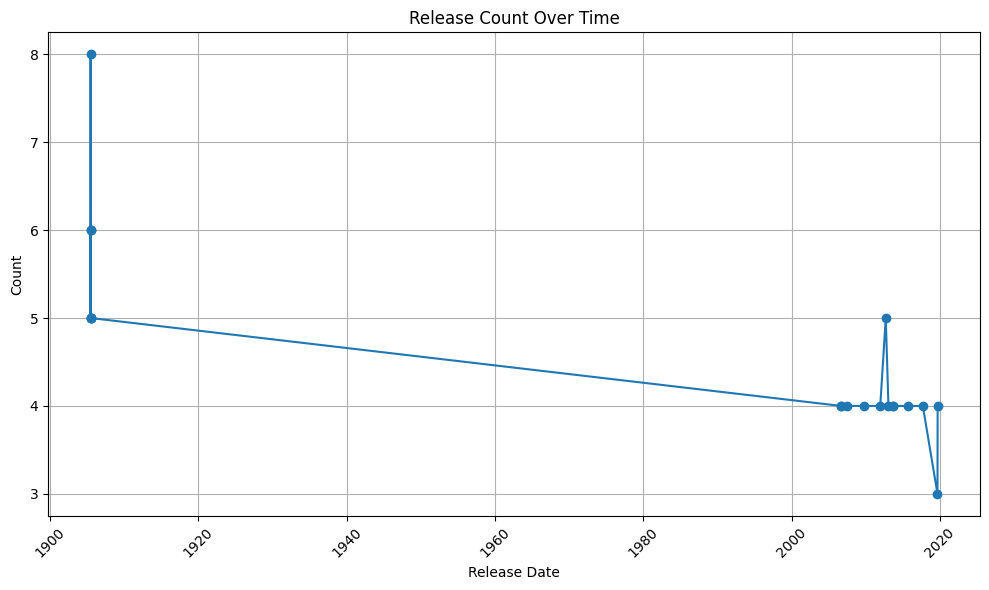

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(dfReleaseDate['releaseDate'], dfReleaseDate['Count'], marker='o', linestyle='-')
plt.title('Release Count Over Time')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

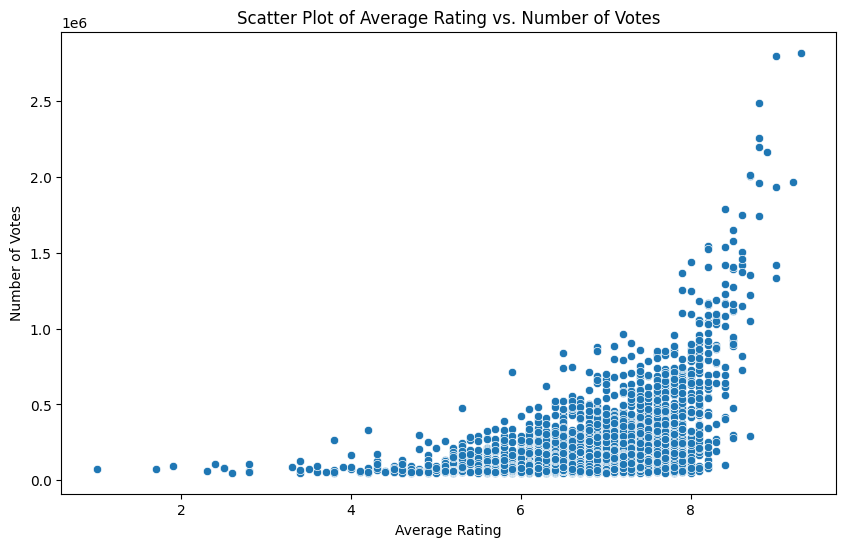

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='averageRating', y='numVotes', data=df)
plt.title('Scatter Plot of Average Rating vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.show()

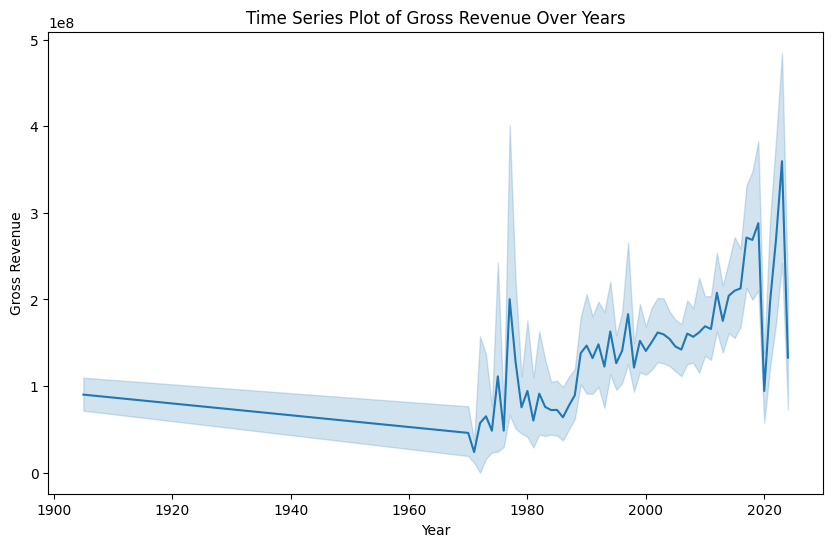

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='gross', data=df)
plt.title('Time Series Plot of Gross Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Gross Revenue')
plt.show()

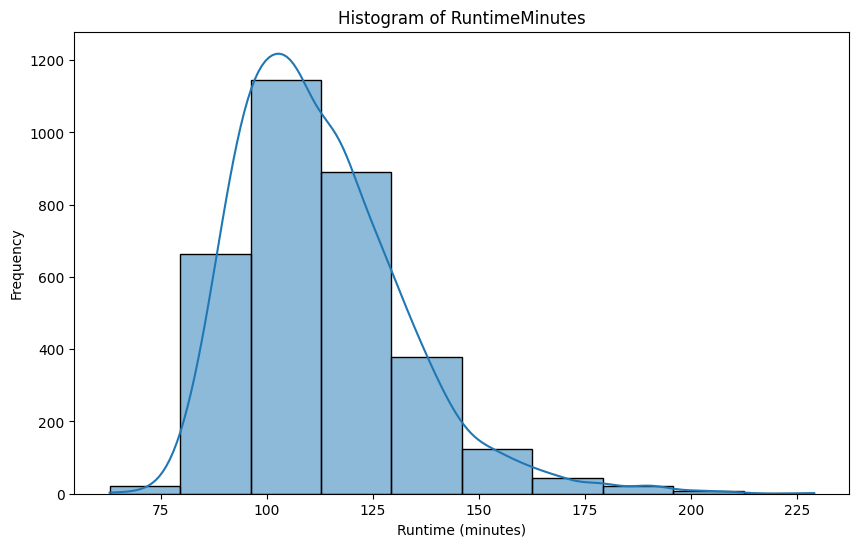

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtimeMinutes'], bins=10, kde=True)
plt.title('Histogram of RuntimeMinutes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

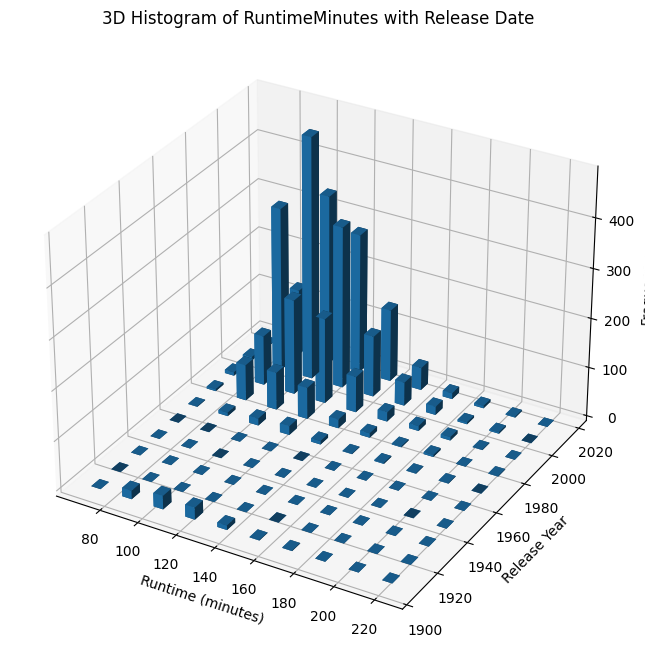

In [88]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection='3d')

# Plot the 3D histogram
hist, xedges, yedges = np.histogram2d(df['runtimeMinutes'], df['releaseDate'].dt.year, bins=(10, 10))
xpos, ypos = np.meshgrid(xedges[:-1] + 5, yedges[:-1] + 0.5, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the bars.
dx = dy = 5 * np.ones_like(zpos)
dz = hist.ravel()

# Create 3D bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', cmap='viridis')

# Set labels and title
ax.set_xlabel('Runtime (minutes)')
ax.set_ylabel('Release Year')
ax.set_zlabel('Frequency')
plt.title('3D Histogram of RuntimeMinutes with Release Date')

plt.show()